In [35]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_excel('P3- Churn-Modelling Data.xlsx')

In [37]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Customer Demographics

In [38]:
df['Age'].max()

92

In [39]:
df['Age'].min()

18

In [101]:
bins=[18,20,30,40,50,60,70,80,90,100]
age_group=['18-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']

In [102]:
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=age_group)    #add a new column age group

In [103]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned,AgeGroup
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50


In [104]:
df['AgeGroup'].value_counts()

AgeGroup
31-40     4451
41-50     2320
21-30     1879
51-60      797
61-70      331
71-80      121
18-20       67
81-90       10
91-100       2
Name: count, dtype: int64

In [43]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

### Churn Analysis

In [44]:
total_customers=len(df)

In [45]:
churned_customers=df[df['churned']==1]

In [46]:
print("Percentage of churned customers:",len(churned_customers)*100.0/total_customers)

Percentage of churned customers: 20.37


In [105]:
len(churned_customers)

2037

### Product usage

### Financial Analysis

In [47]:
df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
churned               int64
AgeGroup           category
dtype: object

In [48]:
avg_balance=df['Balance'].mean()

In [49]:
avg_balance

76485.889288

In [50]:
avg_bal_churn=df.groupby('churned')['Balance'].mean()

In [51]:
avg_bal_churn

churned
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [107]:
print("Average balance of churned customers is: ",avg_bal_churn[1])
print("Average balance of non-churned customers is:",avg_bal_churn[0])

Average balance of churned customers is:  91108.53933726068
Average balance of non-churned customers is: 72745.2967788522


### Predictive Modelling

In [54]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [62]:
df_corr = df.drop(columns=['RowNumber', 'CustomerId', 'Surname','AgeGroup'])

In [56]:
from sklearn.preprocessing import LabelEncoder

In [63]:
label_encoder=LabelEncoder()
df_corr['Geography']=label_encoder.fit_transform(df_corr['Geography'])
df_corr['Gender']=label_encoder.fit_transform(df_corr['Gender'])

In [64]:
df_corr.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
churned              int64
dtype: object

In [65]:
corr_mat=df_corr.corr()

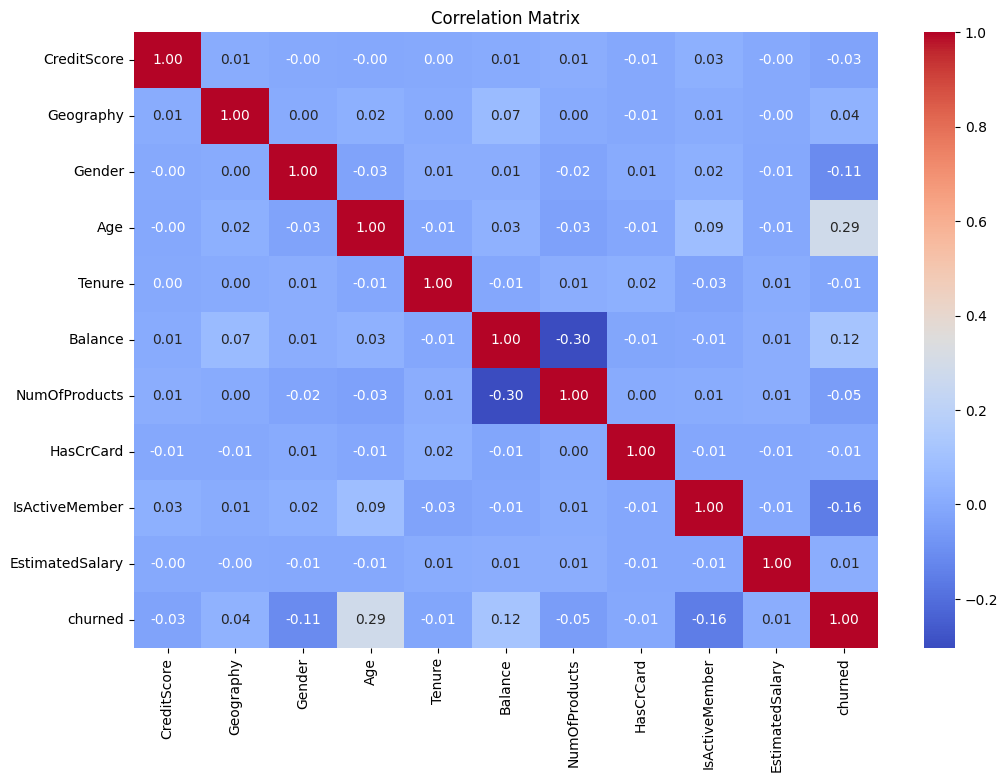

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [72]:
corr_mat['churned']

CreditScore       -0.027094
Geography          0.035943
Gender            -0.106512
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
churned            1.000000
Name: churned, dtype: float64

In [81]:
X = df_corr.drop(columns=['churned'])
y = df_corr['churned']

In [75]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [83]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=35)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=35)

In [84]:
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1600
           1       0.75      0.45      0.56       400

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

[[1540   60]
 [ 220  180]]


In [88]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=False, inplace=True)

In [90]:
feature_imp

Age                0.241489
EstimatedSalary    0.146715
CreditScore        0.141466
Balance            0.139736
NumOfProducts      0.133558
Tenure             0.081203
IsActiveMember     0.042000
Geography          0.036254
Gender             0.019250
HasCrCard          0.018327
dtype: float64

In [91]:
feature_imp.head(5)   

Age                0.241489
EstimatedSalary    0.146715
CreditScore        0.141466
Balance            0.139736
NumOfProducts      0.133558
dtype: float64

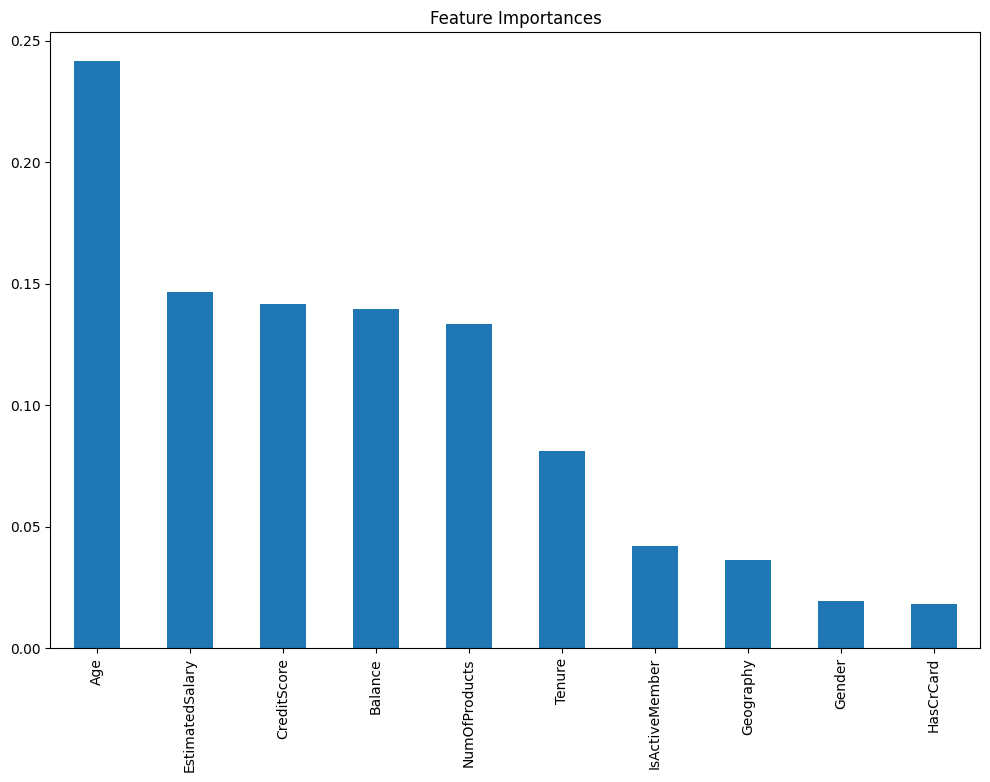

In [92]:
plt.figure(figsize=(12, 8))
feature_imp.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [93]:
from sklearn.linear_model import LogisticRegression

In [96]:
logistic_model = LogisticRegression(random_state=40, max_iter=1500)

In [97]:
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)

C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[1560   40]
 [ 346   54]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1600
           1       0.57      0.14      0.22       400

    accuracy                           0.81      2000
   macro avg       0.70      0.55      0.55      2000
weighted avg       0.77      0.81      0.76      2000

